In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, search_around_sky
from astropy.table import Table

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [82]:
first = Table.read('../../first_14dec17.fits.gz')
pred = pd.read_csv('Predicting_radio_ccomplete.csv')

In [83]:
first_sky = SkyCoord(ra=first['RA'], dec=first['DEC'])
pred_sky  = SkyCoord(ra=pred['pred_ra'].values*u.deg, dec=pred['pred_dec'].values*u.deg)
fake_sky  = SkyCoord(ra=pred['fake_ra'].values*u.deg, dec=pred['fake_dec'].values*u.deg)

In [84]:
seplimit = 5*u.arcsec
pred_res = search_around_sky(first_sky, pred_sky, seplimit=seplimit)
fake_res = search_around_sky(first_sky, fake_sky, seplimit=seplimit)

In [85]:
pred.loc[pred_res[1],'match_ra'] = first[pred_res[0]]['RA']
pred.loc[pred_res[1],'match_dec'] = first[pred_res[0]]['DEC']

pred.loc[fake_res[1],'fake_match_ra'] = first[fake_res[0]]['RA']
pred.loc[fake_res[1],'fake_match_dec'] = first[fake_res[0]]['DEC']

In [86]:
pred_match = SkyCoord(ra=pred['match_ra'].values*u.deg, dec=pred['match_dec'].values*u.deg)
fake_match = SkyCoord(ra=pred['fake_match_ra'].values*u.deg, dec=pred['fake_match_dec'].values*u.deg)

/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/astropy/coordinates/angles.py:646: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/astropy/coordinates/angles.py:646: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):


In [87]:
res = pred_match.separation(pred_sky)
fakeres = fake_match.separation(fake_sky)

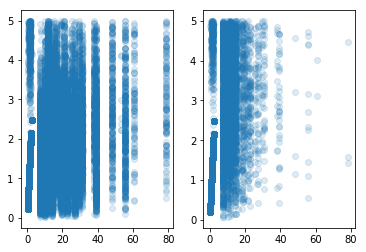

In [88]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.scatter((pred['pred_sep'].values*u.deg).to(u.arcsec), res.to(u.arcsec), alpha=0.15)
ax2.scatter((pred['fake_sep'].values*u.deg).to(u.arcsec), fakeres.to(u.arcsec), alpha=0.15)

fig.show()


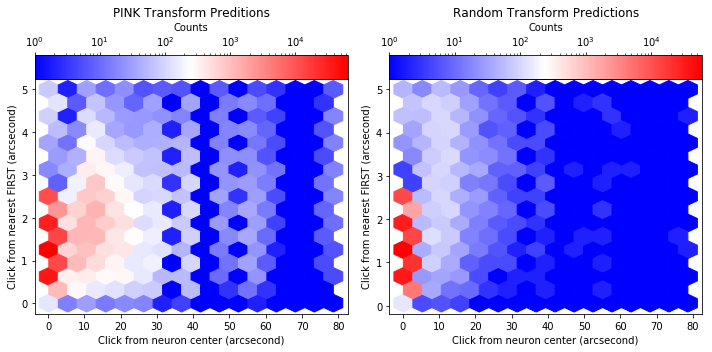

In [92]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('top', size='10%')

im = ax1.hexbin((pred['pred_sep'].values*u.deg).to(u.arcsec), res.to(u.arcsec), gridsize=15, 
                cmap='bwr', bins='log')#, mincnt=1)
ax1.set(xlabel='Click from neuron center (arcsecond)',
        ylabel='Click from nearest FIRST (arcsecond)')
fig.colorbar(im, cax=cax1, label='Counts', orientation='horizontal')
cax1.xaxis.set_ticks_position('top')
cax1.xaxis.set_label_position('top')
cax1.set(title='PINK Transform Preditions')

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('top', size='10%')

im = ax2.hexbin((pred['fake_sep'].values*u.deg).to(u.arcsec), fakeres.to(u.arcsec), gridsize=15,
                cmap='bwr', bins='log')#, mincnt=1)
ax2.set(xlabel='Click from neuron center (arcsecond)',
        ylabel='Click from nearest FIRST (arcsecond)')
fig.colorbar(im, cax=cax2, label='Counts', orientation='horizontal')
cax2.xaxis.set_ticks_position('top')
cax2.xaxis.set_label_position('top')
cax2.set(title='Random Transform Predictions')

fig.tight_layout()
fig.savefig('Images/Predicted_Position_FIRST_HexBin.png')

/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


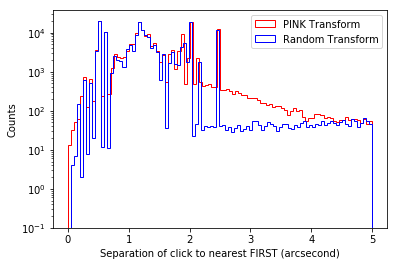

In [90]:
fig, ax = plt.subplots(1,1)

ax.hist(res.to(u.arcsec).value, histtype='step', color='red', bins=100, log=True, label='PINK Transform')
ax.hist(fakeres.to(u.arcsec).value, histtype='step', color='blue', bins=100, log=True, label='Random Transform')
ax.set(xlabel ='Separation of click to nearest FIRST (arcsecond)',
       ylabel ='Counts')
ax.legend()
fig.savefig('Images/Predicted_Positions_Separation_Hist.png')

('(0, 5)', '(0, 9)', '(1, 5)', '(10, 0)', '(10, 1)', '(10, 10)', '(10, 11)', '(10, 2)', '(10, 3)', '(11, 0)', '(11, 1)', '(11, 10)', '(11, 11)', '(11, 2)', '(11, 3)', '(11, 4)', '(11, 5)', '(11, 9)', '(2, 2)', '(4, 3)', '(6, 0)', '(6, 1)', '(7, 0)', '(7, 1)', '(7, 2)', '(7, 3)', '(8, 0)', '(8, 11)', '(8, 3)', '(9, 0)', '(9, 1)', '(9, 11)', '(9, 2)', '(9, 4)')


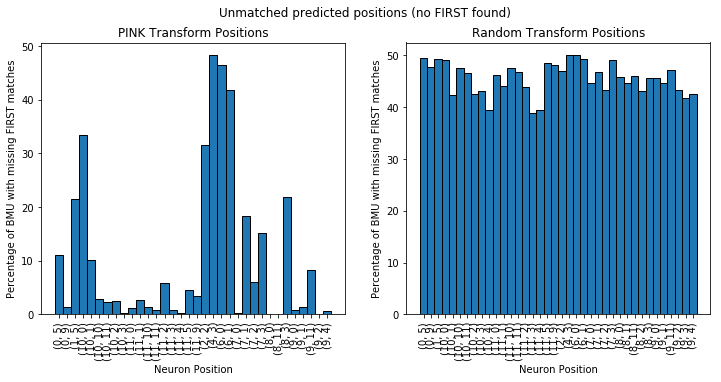

In [93]:
from collections import Counter

cr = Counter(pred.iloc[np.isnan(res)]['bmu_pos'])
cf = Counter(pred.iloc[np.isnan(fakeres)]['bmu_pos'])
d = Counter(pred['bmu_pos'])

# for k in c.keys():
#     print(f"{k}\t {c[k]}\t  {d[k]}\t {c[k]/d[k]*100:.2f}")
    
labels, cnt = zip(*sorted(cr.items(), key=lambda x:x[0]))
print(labels)

indexes = np.arange(len(labels))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

labels, cnt = zip(*sorted(cr.items(), key=lambda x:x[0]))
indexes = np.arange(len(labels))
real_cnt = np.array([d[k] for k in labels])

# ax1.bar(indexes, real_cnt, 1, edgecolor='black', color='red')
ax1.bar(indexes, np.array(cnt)/real_cnt*100, 1, edgecolor='black')
ax1.set_xticks(indexes)
ax1.set_xticklabels(labels, rotation=90)
ax1.set(title='PINK Transform Positions', xlabel='Neuron Position',
       ylabel='Percentage of BMU with missing FIRST matches')

labels, cnt = zip(*sorted(cf.items(), key=lambda x:x[0]))
indexes = np.arange(len(labels))
real_cnt = [d[k] for k in labels]

# ax2.bar(indexes, real_cnt, 1, edgecolor='black', color='red')
ax2.bar(indexes, np.array(cnt)/real_cnt*100, 1, edgecolor='black')
ax2.set_xticks(indexes)
ax2.set_xticklabels(labels, rotation=90)
ax2.set(title='Random Transform Positions', xlabel='Neuron Position',
       ylabel='Percentage of BMU with missing FIRST matches')

fig.suptitle('Unmatched predicted positions (no FIRST found)')
fig.savefig('Images/Predicted_Unmatched_Positions.png')
# fig.show()

/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


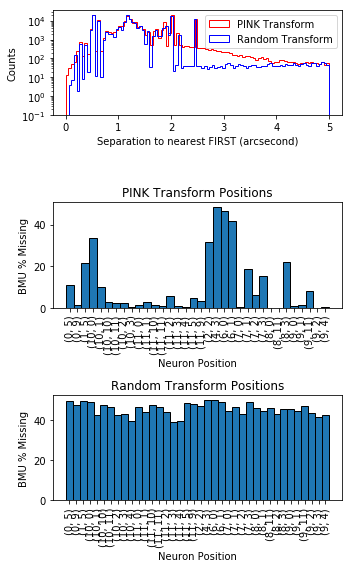

In [109]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5,8))

ax1.hist(res.to(u.arcsec).value, histtype='step', color='red', bins=100, log=True, label='PINK Transform')
ax1.hist(fakeres.to(u.arcsec).value, histtype='step', color='blue', bins=100, log=True, label='Random Transform')
ax1.set(xlabel ='Separation to nearest FIRST (arcsecond)',
        ylabel ='Counts')
ax1.legend()

labels, cnt = zip(*sorted(cr.items(), key=lambda x:x[0]))

indexes = np.arange(len(labels))

labels, cnt = zip(*sorted(cr.items(), key=lambda x:x[0]))
indexes = np.arange(len(labels))
real_cnt = np.array([d[k] for k in labels])

# ax1.bar(indexes, real_cnt, 1, edgecolor='black', color='red')
ax2.bar(indexes, np.array(cnt)/real_cnt*100, 1, edgecolor='black')
ax2.set_xticks(indexes)
ax2.set_xticklabels(labels, rotation=90)
ax2.set(title='PINK Transform Positions', xlabel='Neuron Position',
       ylabel='BMU % Missing')

labels, cnt = zip(*sorted(cf.items(), key=lambda x:x[0]))
indexes = np.arange(len(labels))
real_cnt = [d[k] for k in labels]

# ax2.bar(indexes, real_cnt, 1, edgecolor='black', color='red')
ax3.bar(indexes, np.array(cnt)/real_cnt*100, 1, edgecolor='black')
ax3.set_xticks(indexes)
ax3.set_xticklabels(labels, rotation=90)
ax3.set(title='Random Transform Positions', xlabel='Neuron Position',
        ylabel='BMU % Missing')

fig.tight_layout()
# fig.show()
fig.savefig('Images/Missing_First_Matching.pdf')